In [1]:
%matplotlib inline
# Dependencies and Setup
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
# Files to Load
marathon_men_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 7\\Resources\\major_marathon_men (1).csv"
marathon_women_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 7\\Resources\\major_marathon_women (2).csv"


# Read the men and women Data
marathon_men_data_df = pd.read_csv(marathon_men_data)
marathon_women_data_df = pd.read_csv(marathon_women_data)


In [3]:
# Merge the two datasets 
joined_data_df = pd.concat([marathon_men_data_df, marathon_women_data_df])
joined_data_df.head(5)

,Year,Athlete,Country,Time,Marathon
0,2018.0,Yuki Kawauchi,Japan,2:15:58,Boston
1,2018.0,Mo Farah,United Kingdom,2:05:11,Chicago
2,2018.0,Eliud Kipchoge,Kenya,2:01:39,Berlin
3,2018.0,Eliud Kipchoge,Kenya,2:04:17,London
4,2018.0,Dickson Chumba,Kenya,2:05:30,Tokyo


In [4]:
# Using GroupBy in order to separate the data into fields according to "Country" values
grouped_country_df = joined_data_df.groupby(['Country'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_country_df)

# In order to be visualized, a data function must be used...
# grouped_country_df.count()

In [5]:
#Winner Count per country
Winner_Count_per_country = grouped_country_df[["Athlete"]].count()
Winner_Count_per_country.sort_values(by=["Athlete"], ascending=False).head(5)



,Athlete
Country,
Kenya,139
United States,70
Ethiopia,51
United Kingdom,36
Japan,19


In [6]:
# File to Load
country_gdp_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 7\\Resources\\Country GDP.csv"

# Use Pandas to read data
country_gdp_pd = pd.read_csv(country_gdp_data)
country_gdp_pd = country_gdp_pd.fillna('0')
country_gdp_pd.head()

,Year,Ethiopia,United Kingdom,Japan,Kenya,United States
0,1960,0,"72,328,047,042.16","44,307,342,950.40","791,265,458.82","543,300,000,000.00"
1,1961,0,"76,694,360,635.92","53,508,617,739.38","792,959,472.14","563,300,000,000.00"
2,1962,0,"80,601,939,635.25","60,723,018,683.73","868,111,400.01","605,100,000,000.00"
3,1963,0,"85,443,766,670.43","69,498,131,797.33","926,589,348.57","638,600,000,000.00"
4,1964,0,"93,387,598,813.93","81,749,006,381.51","998,759,333.64","685,800,000,000.00"


In [7]:
country_gdp_pd['Kenya'] = [float(blah.replace(",","")) for blah in country_gdp_pd['Kenya']]

In [8]:
country_gdp_pd['United Kingdom'] = [float(blah.replace(",","")) for blah in country_gdp_pd['United Kingdom']]


In [9]:
country_gdp_pd['Japan'] = [float(blah.replace(",","")) for blah in country_gdp_pd['Japan']]


In [10]:
country_gdp_pd['United States'] = [float(blah.replace(",","")) for blah in country_gdp_pd['United States']]


In [11]:
country_gdp_pd['Ethiopia'] = [float(blah.replace(",","")) for blah in country_gdp_pd['Ethiopia']]

#FILTERING BY COUNTRIES

In [12]:
#Ethiopian Data - Winner count per year
Ethiopia_data = joined_data_df[joined_data_df['Country']=='Ethiopia']
Ethiopia_data = Ethiopia_data["Year"].value_counts()
Ethiopia_data.head()


2010.0    6
2016.0    5
2015.0    4
2014.0    4
2012.0    4
Name: Year, dtype: int64

In [13]:
#UK Data
United_Kingdom_data = joined_data_df[joined_data_df['Country']=='United Kingdom']
United_Kingdom_data = United_Kingdom_data["Year"].value_counts()
United_Kingdom_data.head()

1985.0    4
1996.0    3
1982.0    3
1984.0    3
1983.0    2
Name: Year, dtype: int64

In [14]:
#Japan Data
Japan_data = joined_data_df[joined_data_df['Country']=='Japan']
Japan_data = Japan_data["Year"].value_counts()
Japan_data.head()

1987.0    2
1986.0    2
2000.0    1
1965.0    1
2010.0    1
Name: Year, dtype: int64

In [15]:
#Kenyan Data
Kenya_data = joined_data_df[joined_data_df['Country']=='Kenya']
Kenya_data = Kenya_data["Year"].value_counts()
Kenya_data.head()

2013.0    9
2017.0    9
2015.0    8
2011.0    8
2014.0    8
Name: Year, dtype: int64

In [16]:
#USA Data
United_States_data = joined_data_df[joined_data_df['Country']=='United States']
United_States_data = United_States_data["Year"].value_counts()
United_States_data.head()

1978.0    5
1979.0    5
1977.0    5
1982.0    4
1973.0    4
Name: Year, dtype: int64

In [17]:
Ethiopia_gdp = country_gdp_pd[['Year','Ethiopia']]
# Ethiopia_data

In [18]:
# Merge the two datasets 
# combined_Ethiopia_data_df = pd.merge(Ethiopia_gdp, Ethiopia_data, on='Year', how="left")
# combined_Ethiopia_data_df

In [19]:
Ethiopia1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='Ethiopia'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
Ethiopia2 = country_gdp_pd[['Year','Ethiopia']]
Ethiopia = pd.merge(Ethiopia2, Ethiopia1, on='Year', how='left')
Ethiopia = Ethiopia.fillna(0)
Ethiopia.head()
#plt.scatter(Ethiopia['Ethiopia'],Ethiopia['Athlete'])

,Year,Ethiopia,Athlete
0,1960,0.0,0.0
1,1961,0.0,0.0
2,1962,0.0,0.0
3,1963,0.0,0.0
4,1964,0.0,0.0


In [20]:
Japan1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='Japan'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
Japan2 = country_gdp_pd[['Year','Japan']]
Japan = pd.merge(Japan2, Japan1, on='Year', how='left')
Japan = Japan.fillna(0)
Japan.head()
#plt.scatter(Japan['Japan'],Japan['Athlete'])

,Year,Japan,Athlete
0,1960,4.430734e+10,0.0
1,1961,5.350862e+10,0.0
2,1962,6.072302e+10,0.0
3,1963,6.949813e+10,0.0
4,1964,8.174901e+10,0.0


In [21]:
UK1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='United Kingdom'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
UK2 = country_gdp_pd[['Year','United Kingdom']]
UK = pd.merge(UK2, UK1, on='Year', how='left')
UK = UK.fillna(0)
UK.head()

,Year,United Kingdom,Athlete
0,1960,7.232805e+10,0.0
1,1961,7.669436e+10,0.0
2,1962,8.060194e+10,0.0
3,1963,8.544377e+10,0.0
4,1964,9.338760e+10,0.0


In [22]:
USA1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='United States'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
USA2 = country_gdp_pd[['Year','United States']]
USA = pd.merge(USA2, USA1, on='Year', how='left')
USA = USA.fillna(0)
USA.head()
#plt.scatter(USA['United States'],USA['Athlete'])


,Year,United States,Athlete
0,1960,5.433000e+11,0.0
1,1961,5.633000e+11,0.0
2,1962,6.051000e+11,0.0
3,1963,6.386000e+11,0.0
4,1964,6.858000e+11,0.0


In [23]:
Kenya1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='Kenya'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
Kenya2 = country_gdp_pd[['Year','Kenya']]
Kenya = pd.merge(Kenya2, Kenya1, on='Year', how='left')
Kenya = Kenya.fillna(0)
Kenya.head()

,Year,Kenya,Athlete
0,1960,7.912655e+08,0.0
1,1961,7.929595e+08,0.0
2,1962,8.681114e+08,0.0
3,1963,9.265893e+08,0.0
4,1964,9.987593e+08,0.0


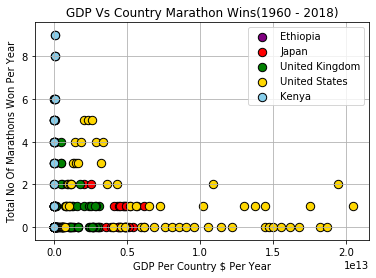

In [24]:
#define data
y1 = Ethiopia['Athlete']
x1 = Ethiopia['Ethiopia']
y2 = Japan['Athlete']
x2 = Japan['Japan']
y3 = UK['Athlete']
x3 = UK['United Kingdom']
y4 = USA['Athlete']
x4 = USA['United States']
y5 = Kenya['Athlete']
x5 = Kenya['Kenya']


plt.xlabel('GDP Per Country $ Per Year')
plt.ylabel('Total No Of Marathons Won Per Year')
plt.title('GDP Vs Country Marathon Wins(1960 - 2018)')



plt.scatter(x1, y1, marker='o', label='Ethiopia', s=70, c='purple' , alpha=1, edgecolors='black')
plt.scatter(x2, y2, marker='o', label='Japan', s=70, c='red', alpha=1, edgecolors='black')
plt.scatter(x3, y3, marker='o', label='United Kingdom', s=70, c='green', alpha=1, edgecolors='black')
plt.scatter(x4, y4, marker='o', label='United States', s=70, c='gold', alpha=1, edgecolors='black')
plt.scatter(x5, y5, marker='o', label='Kenya', c='skyblue', s=70, alpha=1, edgecolors='black')

# Plot legend.
plt.legend(loc="upper right", markerscale=1., scatterpoints=1, fontsize=10)
plt.grid(True)
plt.savefig("../Images/GDP_MarathonWins.png")
plt.show()

In [25]:
#Summary TableI - ANALYSIS BY YEAR

Summary_Table1 = pd.DataFrame(
    {"Year": Kenya['Year'],"Kenya GDP": Kenya['Kenya'], "Kenya Wins": Kenya['Athlete'],
     "USA GDP": USA['United States'], "USA Wins": USA['Athlete'],
     "UK GDP": UK['United Kingdom'], "UK Wins": UK['Athlete'],
     "Japan GDP": Japan['Japan'], "Japan Wins": Japan['Athlete'],
     "Ethiopia GDP": Ethiopia['Ethiopia'], "Ethiopia Wins": Ethiopia['Athlete'],
   
     })

Summary_Table1.head()

,Year,Kenya GDP,Kenya Wins,USA GDP,USA Wins,UK GDP,UK Wins,Japan GDP,Japan Wins,Ethiopia GDP,Ethiopia Wins
0,1960,7.912655e+08,0.0,5.433000e+11,0.0,7.232805e+10,0.0,4.430734e+10,0.0,0.0,0.0
1,1961,7.929595e+08,0.0,5.633000e+11,0.0,7.669436e+10,0.0,5.350862e+10,0.0,0.0,0.0
2,1962,8.681114e+08,0.0,6.051000e+11,0.0,8.060194e+10,0.0,6.072302e+10,0.0,0.0,0.0
3,1963,9.265893e+08,0.0,6.386000e+11,0.0,8.544377e+10,0.0,6.949813e+10,0.0,0.0,0.0
4,1964,9.987593e+08,0.0,6.858000e+11,0.0,9.338760e+10,0.0,8.174901e+10,0.0,0.0,0.0


In [26]:
# Create bins in which to place values based upon every decade
bins = [1959, 1969, 1979, 1989, 1999, 2009, 2019]

# Create labels for these bins
group_labels = ["1959 to 1969", "1970 to 1979", "1980 to 1989" , "1990 to 1999" , "2000 to 2010" , 
                "2011 to 2020"]
# Slice the data and place it into bins
pd.cut(Summary_Table1["Year"], bins, labels=group_labels).head()

0    1959 to 1969
1    1959 to 1969
2    1959 to 1969
3    1959 to 1969
4    1959 to 1969
Name: Year, dtype: category
Categories (6, object): [1959 to 1969 < 1970 to 1979 < 1980 to 1989 < 1990 to 1999 < 2000 to 2010 < 2011 to 2020]

In [27]:
# Place the data series into a new column inside of the DataFrame
Summary_Table1["Decades"] = pd.cut(Summary_Table1["Year"], bins, labels=group_labels)
Summary_Table1.tail()

,Year,Kenya GDP,Kenya Wins,USA GDP,USA Wins,UK GDP,UK Wins,Japan GDP,Japan Wins,Ethiopia GDP,Ethiopia Wins,Decades
54,2014,6.144805e+10,8.0,1.752175e+13,1.0,3.034729e+12,0.0,4.850414e+12,0.0,5.561223e+10,4.0,2011 to 2020
55,2015,6.400775e+10,8.0,1.821930e+13,0.0,2.896421e+12,0.0,4.389476e+12,0.0,6.446455e+10,4.0,2011 to 2020
56,2016,6.918876e+10,6.0,1.870719e+13,0.0,2.659239e+12,0.0,4.926667e+12,0.0,7.427128e+10,5.0,2011 to 2020
57,2017,7.875739e+10,9.0,1.948539e+13,2.0,2.637866e+12,0.0,4.859951e+12,0.0,8.171633e+10,1.0,2011 to 2020
58,2018,8.790826e+10,6.0,2.049410e+13,1.0,2.825208e+12,1.0,4.970916e+12,1.0,8.435546e+10,1.0,2011 to 2020


In [29]:
# Kenya Wins Per Decade
Summary_Table = Summary_Table1.groupby("Decades")
Kenya_Wins_per_decade = (Summary_Table['Kenya Wins'].sum())
Kenya_Wins_per_decade

Decades
1959 to 1969     0.0
1970 to 1979     0.0
1980 to 1989     4.0
1990 to 1999    24.0
2000 to 2010    47.0
2011 to 2020    64.0
Name: Kenya Wins, dtype: float64

In [30]:
# Average GDP per Bin - Kenya
Summary_Table = Summary_Table1.groupby("Decades")
Kenya_GDP_per_decade = (Summary_Table['Kenya GDP'].mean().round(2))
Kenya_GDP_per_decade


Decades
1959 to 1969    1.058436e+09
1970 to 1979    3.373096e+09
1980 to 1989    7.070550e+09
1990 to 1999    9.903087e+09
2000 to 2010    2.192772e+10
2011 to 2020    6.097480e+10
Name: Kenya GDP, dtype: float64

In [31]:
#plt.scatter(Kenya_GDP_per_decade,Kenya_Wins_per_decade)

In [32]:
# USA wins per Decade
Summary_Table = Summary_Table1.groupby("Decades")
USA_Wins_per_decade = (Summary_Table['USA Wins'].sum())
USA_Wins_per_decade

Decades
1959 to 1969     5.0
1970 to 1979    36.0
1980 to 1989    17.0
1990 to 1999     2.0
2000 to 2010     6.0
2011 to 2020     4.0
Name: USA Wins, dtype: float64

In [33]:
# USA Average GDP per Bin
Summary_Table = Summary_Table1.groupby("Decades")
USA_GDP_per_decade = (Summary_Table['USA GDP'].mean().round(2))
USA_GDP_per_decade

Decades
1959 to 1969    7.418900e+11
1970 to 1979    1.710696e+12
1980 to 1989    4.173163e+12
1990 to 1999    7.577130e+12
2000 to 2010    1.259074e+13
2011 to 2020    1.754936e+13
Name: USA GDP, dtype: float64

In [34]:
#plt.scatter(USA_GDP_per_decade,USA_Wins_per_decade)

In [35]:
# UK wins per Decade
Summary_Table = Summary_Table1.groupby("Decades")
UK_Wins_per_decade = (Summary_Table['UK Wins'].sum())
UK_Wins_per_decade

Decades
1959 to 1969     0.0
1970 to 1979     1.0
1980 to 1989    18.0
1990 to 1999     9.0
2000 to 2010     7.0
2011 to 2020     1.0
Name: UK Wins, dtype: float64

In [36]:
# UK Average GDP per Bin
Summary_Table = Summary_Table1.groupby("Decades")
UK_GDP_per_decade = (Summary_Table['UK GDP'].mean().round(2))
UK_GDP_per_decade

Decades
1959 to 1969    9.447072e+10
1970 to 1979    2.359735e+11
1980 to 1989    6.244775e+11
1990 to 1999    1.322634e+12
2000 to 2010    2.309963e+12
2011 to 2020    2.730159e+12
Name: UK GDP, dtype: float64

In [37]:
# Japan wins per Decade
Summary_Table = Summary_Table1.groupby("Decades")
Japan_Wins_per_decade = (Summary_Table['Japan Wins'].sum())
Japan_Wins_per_decade

Decades
1959 to 1969    3.0
1970 to 1979    0.0
1980 to 1989    5.0
1990 to 1999    0.0
2000 to 2010    8.0
2011 to 2020    3.0
Name: Japan Wins, dtype: float64

In [38]:
# Japan Average GDP per Bin
Summary_Table = Summary_Table1.groupby("Decades")
Japan_GDP_per_decade = (Summary_Table['Japan GDP'].mean().round(2))
Japan_GDP_per_decade

Decades
1959 to 1969    9.489516e+10
1970 to 1979    5.580241e+11
1980 to 1989    1.815785e+12
1990 to 1999    4.327938e+12
2000 to 2010    4.663733e+12
2011 to 2020    5.245990e+12
Name: Japan GDP, dtype: float64

In [39]:
# Ethiopia wins per Decade
Summary_Table = Summary_Table1.groupby("Decades")
Ethiopia_Wins_per_decade = (Summary_Table['Ethiopia Wins'].sum())
Ethiopia_Wins_per_decade

Decades
1959 to 1969     0.0
1970 to 1979     0.0
1980 to 1989     1.0
1990 to 1999     3.0
2000 to 2010    16.0
2011 to 2020    31.0
Name: Ethiopia Wins, dtype: float64

In [44]:
#Summary TableII - WINNERS
Summary_TableII = pd.DataFrame(
    {"Kenya_Wins_per_decade": Kenya_Wins_per_decade,
     "USA_Wins_per_decade": USA_Wins_per_decade,
     "UK_Wins_per_decade": UK_Wins_per_decade,
     "Japan_Wins_per_decade": Japan_Wins_per_decade,
     "Ethiopia_Wins_per_decade": Ethiopia_Wins_per_decade,
     
     })

Summary_TableII

,Kenya_Wins_per_decade,USA_Wins_per_decade,UK_Wins_per_decade,Japan_Wins_per_decade,Ethiopia_Wins_per_decade
Decades,,,,,
1959 to 1969,0.0,5.0,0.0,3.0,0.0
1970 to 1979,0.0,36.0,1.0,0.0,0.0
1980 to 1989,4.0,17.0,18.0,5.0,1.0
1990 to 1999,24.0,2.0,9.0,0.0,3.0
2000 to 2010,47.0,6.0,7.0,8.0,16.0
2011 to 2020,64.0,4.0,1.0,3.0,31.0


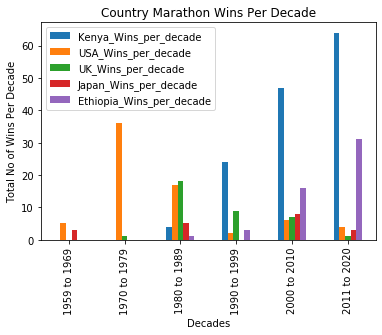

In [45]:

Summary_TableII.plot.bar()
plt.legend(loc="best")
colors = ["skyblue","gold", "green", "red", "purple"]
plt.title("Country Marathon Wins Per Decade")
plt.xlabel("Decades")
plt.ylabel("Total No of Wins Per Decade")
plt.savefig("../Images/Country_MarathonWinsPerDecade.png")

In [40]:
# Ethiopia Average GDP per Bin
Summary_Table = Summary_Table1.groupby("Decades")
Ethiopia_GDP_per_decade = (Summary_Table['Ethiopia GDP'].mean().round(2))
Ethiopia_GDP_per_decade

Decades
1959 to 1969    0.000000e+00
1970 to 1979    0.000000e+00
1980 to 1989    8.393908e+09
1990 to 1999    9.221089e+09
2000 to 2010    1.499733e+10
2011 to 2020    5.702948e+10
Name: Ethiopia GDP, dtype: float64

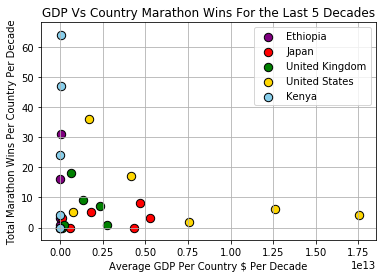

In [41]:
#define data
y1 = Ethiopia_Wins_per_decade
x1 = Ethiopia_GDP_per_decade
y2 = Japan_Wins_per_decade
x2 = Japan_GDP_per_decade
y3 = UK_Wins_per_decade
x3 = UK_GDP_per_decade
y4 = USA_Wins_per_decade
x4 = USA_GDP_per_decade
y5 = Kenya_Wins_per_decade
x5 = Kenya_GDP_per_decade


plt.xlabel('Average GDP Per Country $ Per Decade')
plt.ylabel('Total Marathon Wins Per Country Per Decade')
plt.title('GDP Vs Country Marathon Wins For the Last 5 Decades')



plt.scatter(x1, y1, marker='o', label='Ethiopia', s=70, c='purple' , alpha=1, edgecolors='black')
plt.scatter(x2, y2, marker='o', label='Japan', s=70, c='red', alpha=1, edgecolors='black')
plt.scatter(x3, y3, marker='o', label='United Kingdom', s=70, c='green', alpha=1, edgecolors='black')
plt.scatter(x4, y4, marker='o', label='United States', s=70, c='gold', alpha=1, edgecolors='black')
plt.scatter(x5, y5, marker='o', label='Kenya', c='skyblue', s=70, alpha=1, edgecolors='black')

# Plot legend.
plt.legend(loc="upper right", markerscale=1., scatterpoints=1, fontsize=10)
plt.grid(True)
plt.savefig("../Images/GDP_MarathonWinsPerDecade.png")
plt.show()

#OBSERVABLE TRENDS
#1. The Scatterplot shows that there has been an inverse correlationship between average GDP and total marathon wins amongst the top 5 marathon countries in the last 5 decades.